In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
L = 1    # Simulation box size
N = 32   # Number of data points

In [3]:
dx = L/N
xyz = np.arange(-L/2, L/2, dx)
x, y, z = np.meshgrid(xyz, xyz, xyz, indexing='ij')
r = np.sqrt(x*x + y*y + z*z)
theta = np.arccos(z / r)
theta[np.where(r == 0)] = 0

/Users/robynmunoz/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [5]:
a = 0.5
r = r + 1j * a * np.cos(theta)
r1b = r - 1j * a * np.cos(theta)
Sigma = r1 * r1b
r2 = (1/2) * ((1/r1) + (1/r1b)) / Sigma

In [4]:
def calc_gdet(a, l, M):
    a2 = a*a
    r2 = r*r
    Sigma = r2 + a2 * np.cos(theta)
    F = 2 * M * r * np.exp(-l * r / Sigma)
    Delta = r2 + a2 - F
    st2 = np.sin(theta)**2
    S = st2 * F / Sigma
    D = (S - st2) * (r2 + a2) - st2 * a2 * S
    gdet = (Sigma**2) * D / Delta
    return gdet

<ipython-input-4-6456dd6fea17>:5: RuntimeWarning: overflow encountered in exp
  F = 2 * M * r * np.exp(-l * r / Sigma)
<ipython-input-4-6456dd6fea17>:9: RuntimeWarning: invalid value encountered in subtract
  D = (S - st2) * (r2 + a2) - st2 * a2 * S
<ipython-input-4-6456dd6fea17>:5: RuntimeWarning: overflow encountered in exp
  F = 2 * M * r * np.exp(-l * r / Sigma)
<ipython-input-4-6456dd6fea17>:8: RuntimeWarning: overflow encountered in true_divide
  S = st2 * F / Sigma
<ipython-input-4-6456dd6fea17>:9: RuntimeWarning: invalid value encountered in subtract
  D = (S - st2) * (r2 + a2) - st2 * a2 * S
<ipython-input-4-6456dd6fea17>:5: RuntimeWarning: overflow encountered in exp
  F = 2 * M * r * np.exp(-l * r / Sigma)
<ipython-input-4-6456dd6fea17>:8: RuntimeWarning: overflow encountered in true_divide
  S = st2 * F / Sigma
<ipython-input-4-6456dd6fea17>:9: RuntimeWarning: invalid value encountered in subtract
  D = (S - st2) * (r2 + a2) - st2 * a2 * S


Text(0.5, 1.0, '$|g|$')

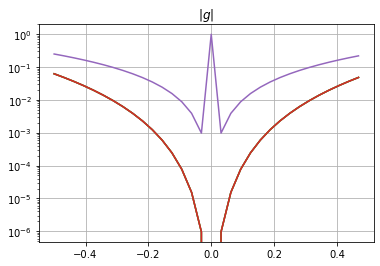

In [10]:
plt.semilogy(x[:,16,16], abs(calc_gdet(1, 0, 1)[:,16,16]), label='a=1, l=0, M=1')
plt.semilogy(x[:,16,16], abs(calc_gdet(1, 1, 1)[:,16,16]), label='a=1, l=1, M=1')
plt.semilogy(x[:,16,16], abs(calc_gdet(1, 10, 1)[:,16,16]), label='a=1, l=10, M=1')
plt.semilogy(x[:,16,16], abs(calc_gdet(1, 100, 1)[:,16,16]), label='a=1, l=100, M=1')
plt.semilogy(x[:,16,16], abs(r*r + np.cos(theta))[:,16,16], label='a=1, l=100, M=1')
plt.grid()
plt.title(r'$|g|$')